# Telecom Churn Case Study

## <font color="blue">Problem Statement
> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecom industries experiences an average of 15% to 25% annual churn rate. Given the fact it costs  5-10 times more to acquire a new customer than to retain a existing customer. So customer retention become more important than customer acquisition.
    
## <font color="blue">Business Objectives
>- For many operators, retaining high profitable customers is the number one business goal.To reduce customer churn, the operators need to predict which customers are high risk of churn.
>- The goal is to build a machine learning model that can able to predict the churning customers using the given dataset.
    

## <font color="blue">Data Understanding and Cleaning

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import imblearn
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Changing settings to view all columns
pd.set_option("display.max_columns",None)

In [3]:
# Reading the data
telecom = pd.read_csv("train.csv", index_col=0)

# Reading the final test data
final_test = pd.read_csv("test.csv", index_col=0)

telecom.head(3)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.

In [4]:
# Checking the dimensions of the dataset
telecom.shape

(69999, 171)

In [5]:
# Checking the informations of the dataset
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

In [6]:
# Checking the value counts
for index,cols in enumerate(telecom.columns):
    print("\033[1m",str(index+1)+")",cols,"\033[0m")
    print(telecom[cols].value_counts())
    print("\n")

 1) circle_id 
109    69999
Name: circle_id, dtype: int64


 2) loc_og_t2o_mou 
0.0    69297
Name: loc_og_t2o_mou, dtype: int64


 3) std_og_t2o_mou 
0.0    69297
Name: std_og_t2o_mou, dtype: int64


 4) loc_ic_t2o_mou 
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64


 5) last_date_of_month_6 
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64


 6) last_date_of_month_7 
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64


 7) last_date_of_month_8 
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64


 8) arpu_6 
 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 302.334       1
 203.494       1
 45.941        1
 3.420         1
 420.059       1
Name: arpu_6, Length: 61615, dtype: int64


 9) arpu_7 
 0.000      2666
-5.000       107
 20.000       49
 1.000        38
 1.500        37
            ... 
 253.392       1
 266.712       1
 166.851       1
 394.185       1
 139.941       1
Name: arpu_7, Length: 61

 39) std_og_t2t_mou_7 
0.00      36677
0.66         47
0.36         46
1.01         45
0.26         43
          ...  
432.64        1
955.66        1
694.98        1
582.38        1
339.26        1
Name: std_og_t2t_mou_7, Length: 14745, dtype: int64


 40) std_og_t2t_mou_8 
0.00      36512
0.31         56
0.50         52
0.28         48
0.56         47
          ...  
444.93        1
43.48         1
997.54        1
245.06        1
575.64        1
Name: std_og_t2t_mou_8, Length: 14483, dtype: int64


 41) std_og_t2m_mou_6 
0.00       25742
0.33          70
0.35          69
0.58          65
0.76          63
           ...  
93.91          1
1095.63        1
467.44         1
243.13         1
344.79         1
Name: std_og_t2m_mou_6, Length: 16059, dtype: int64


 42) std_og_t2m_mou_7 
0.00      26379
0.31         82
0.33         73
0.51         72
0.35         66
          ...  
209.59        1
464.89        1
91.48         1
387.58        1
344.79        1
Name: std_og_t2m_mou_7, Length:

0.00      16478
0.03        127
0.36        121
0.31        118
0.51        117
          ...  
216.68        1
19.15         1
108.13        1
79.94         1
66.46         1
Name: std_ic_mou_8, Length: 9939, dtype: int64


 92) total_ic_mou_6 
0.00       5900
0.18         26
0.20         21
0.23         17
0.28         17
           ... 
1637.89       1
802.36        1
520.86        1
821.41        1
339.26        1
Name: total_ic_mou_6, Length: 27432, dtype: int64


 93) total_ic_mou_7 
0.00       5551
0.20         27
0.33         16
18.48        15
0.76         15
           ... 
628.11        1
664.59        1
360.28        1
141.83        1
3260.48       1
Name: total_ic_mou_7, Length: 27418, dtype: int64


 94) total_ic_mou_8 
0.00       6467
0.66         17
0.46         17
1.96         15
0.26         15
           ... 
726.28        1
234.61        1
1029.59       1
195.14        1
1008.74       1
Name: total_ic_mou_8, Length: 27318, dtype: int64


 95) spl_ic_mou_6 
0.00     

7/31/2014    1282
7/29/2014    1200
7/30/2014    1178
7/28/2014    1131
7/26/2014     857
7/27/2014     839
7/25/2014     716
7/24/2014     613
7/23/2014     584
7/21/2014     572
7/22/2014     568
7/14/2014     551
7/18/2014     528
7/19/2014     512
7/12/2014     482
7/17/2014     481
7/16/2014     477
7/7/2014      473
7/20/2014     471
7/9/2014      448
7/13/2014     441
7/10/2014     431
7/15/2014     427
7/8/2014      425
7/11/2014     387
7/5/2014      381
7/4/2014      349
7/6/2014      343
7/3/2014      273
7/1/2014      226
7/2/2014      219
Name: date_of_last_rech_data_7, dtype: int64


 121) date_of_last_rech_data_8 
8/31/2014    1388
8/30/2014    1306
8/29/2014    1145
8/28/2014     876
8/27/2014     824
8/25/2014     806
8/26/2014     778
8/24/2014     713
8/23/2014     631
8/19/2014     613
8/16/2014     535
8/20/2014     535
8/15/2014     526
8/14/2014     524
8/11/2014     520
8/21/2014     515
8/22/2014     513
8/18/2014     501
8/9/2014      488
8/10/2014     483
8/1

Name: monthly_2g_7, dtype: int64


 154) monthly_2g_8 
0    64817
1     4738
2      413
3       24
4        6
5        1
Name: monthly_2g_8, dtype: int64


 155) sachet_2g_6 
0     60982
1      3898
2      1744
3       936
4       647
5       414
6       326
7       236
8       212
9       152
10      132
11       91
12       80
13       37
14       33
15       20
16       14
17       11
19        8
18        5
22        5
21        4
20        3
25        3
24        1
28        1
30        1
32        1
34        1
42        1
Name: sachet_2g_6, dtype: int64


 156) sachet_2g_7 
0     60677
1      3652
2      1713
3       957
4       767
5       560
6       425
7       307
8       234
10      178
9       135
11      118
12       93
14       42
13       35
15       27
16       13
19       11
18       10
17        8
20        7
23        6
21        5
22        5
26        3
27        3
32        2
24        1
25        1
30        1
35        1
42        1
48        1
Name: sachet_2g_

### Handling Missing values

In [7]:
# Checking for missing values
missing = round((telecom.isnull().sum() / telecom.shape[0])*100,2).sort_values(ascending=False)
print("Total columns that has missing values are",len(missing))
missing[missing !=0]

Total columns that has missing values are 171


count_rech_2g_6             74.90
arpu_2g_6                   74.90
night_pck_user_6            74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
                            ...  
last_date_of_month_8         1.05
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
Length: 125, dtype: float64

#### <font color="blue">Cleaning date columns

In [8]:
# Extracting the date columns
date_cols = [x for x in telecom.columns if "date" in x]

In [9]:
# Checking the date columns
print(round(telecom[date_cols].isnull().sum() / telecom.shape[0] *100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
date_of_last_rech_6          1.57
date_of_last_rech_7          1.76
date_of_last_rech_8          3.52
date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
dtype: float64


In [10]:
# Creating a function to fill mode values
def fill_mode_cols(df, col_list):
    for cols in col_list:
        mode = df[cols].mode()[0]
        df[cols].fillna(value=mode, inplace=True)

# Clearing last dates and last rech columns
fill_mode_cols(telecom, date_cols[:6])
fill_mode_cols(final_test, date_cols[:6])

In [11]:
# Converting date series columns into useful information
total_dataset = [telecom, final_test]
for df in total_dataset:
    # Converting date columns into date time format
    df[date_cols] = df[date_cols].apply(pd.to_datetime)

    # Creating recency recharge column
    df["recent_rech_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_6"]
    df["recent_rech_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_7"]
    df["recent_rech_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_8"]

    # Creating recency recharge for data column
    df["recent_rech_data_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_data_6"]
    df["recent_rech_data_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_data_7"]
    df["recent_rech_data_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_data_8"]

In [12]:
# Creating a list of recency columns in the dataset
recency_cols = [x for x in telecom.columns if "recent" in x]

# Extracting the dates from the columns
for df in total_dataset:
    for cols in recency_cols:
        df[cols] = df[cols].astype(str)
        df[cols] = df[cols].str.split(" ",expand=True)[0]
    
# Imputing the missing values in the recency cols with zero
for df in total_dataset:
    for cols in recency_cols:
        df.loc[(df[cols]=="NaT"), cols] = 0
    
# Dropping the dates columns which is reduntant columns
for df in total_dataset:
    df.drop(date_cols, axis=1, inplace=True)

#### <font color="blue">Cleaning categorical columns

In [13]:
# Extracting the categorical columns
cat_cols = ["churn_probability","fb_user_8","fb_user_7","fb_user_6","night_pck_user_8",
            "night_pck_user_7","night_pck_user_6"]

# Imputing the null values of categorical columns with other new category(-1)
for cols in cat_cols:
    telecom[cols].fillna(value=-1, inplace=True)
for cols in cat_cols[1:]:
    final_test[cols].fillna(value=-1, inplace=True)

#### <font color="blue">Cleaning numeric columns

In [14]:
# Extracting the numeric columns from the dataset
num_cols = telecom.columns.difference(cat_cols + recency_cols)

# Lets extract the recharge, arpu, other columns from the num_cols
mou_cols = [x for x in num_cols if "mou" in x]
rec_cols = [x for x in num_cols if "rec" in x]
arpu_cols = [x for x in num_cols if "arpu" in x]
other_cols = [x for x in num_cols if "other" in x]

# Imputing ARPU and recharge columns with zero
def zero_imputation(list_col):
    for df in total_dataset:
        for cols in list_col:
            df[cols].fillna(value=0, inplace=True)
        
# Imputing zero for all the remaining columns
zero_imputation(mou_cols)
zero_imputation(rec_cols)
zero_imputation(arpu_cols)
zero_imputation(other_cols)

# Checking the missing values after imputation
print("The total missing values in the telecom train dataset after cleaning is",telecom.isnull().sum().sum())
print("The total missing values in the final test after cleaning is",final_test.isnull().sum().sum())

The total missing values in the telecom train dataset after cleaning is 0
The total missing values in the final test after cleaning is 0


In customer churn we assume there are three phases of customer lifecycle:
- Good_phase(month 6 and 7)
- Action_phase(month 8)
- Churn_phase(the next month), and in a separate column, we have the information whether the particular customer has churned or not in the next month.

In [15]:
# Creating some useful features
for df in total_dataset:
    df["total_rech_data_amt_good_phase"] = (df["total_rech_data_6"]*df["av_rech_amt_data_6"] +
                                                 df['total_rech_data_7']*df['av_rech_amt_data_7'])
    df["total_rech_amt_good_phase"] = df["total_rech_amt_6"] + df["total_rech_amt_7"]
    df["total_amt_good_phase"] = df["total_rech_data_amt_good_phase"] + df["total_rech_amt_good_phase"]

#### Derived Column:
1. total_amt_good_phase:
> - Total amount spend by the customers in the good phase.

#### <font color="blue">Dropping reduntant column:

In [16]:
# Checking for columns having same values throughout the column
nunique = telecom.nunique()
Need_to_drop = nunique[nunique == 1].index
Need_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [17]:
# Dropping columns having same values
for df in total_dataset:
    df.drop(nunique[nunique==1].index, axis=1, inplace=True)

In [18]:
# Checking the shape of the dataset
telecom.shape

(69999, 161)

### Handling Outliers

In [19]:
# Checking for outliers using statistical summary
num_cols = num_cols.difference(Need_to_drop)
telecom[num_cols].describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.6397

In [20]:
# As we can see some features has outliers, lets remove some outliers
# Creating a function for outliers
def remove_outliers(df, col_list):
    for cols in col_list:
        Q1 = df[cols].quantile(0.001)
        Q3 = df[cols].quantile(0.999)
        IQR = Q3 - Q1
        df = df[(df[cols] >= Q1-2.5*IQR) & (df[cols] <= Q3+2.5*IQR)]
        
# Removing outliers from numeric columns
for df in total_dataset:
    remove_outliers(df, num_cols)

In [21]:
# After removing some outliers the shape of the telecom dataset is
print(telecom.shape)

(69999, 161)


## <font color="blue">Exploratory Data Analysis

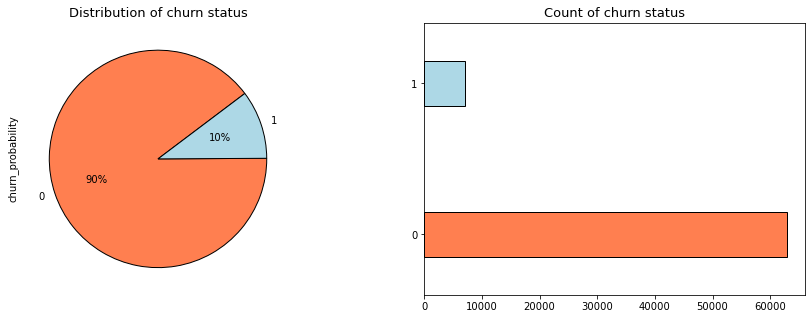

In [22]:
# Checking the churn rate
plt.figure(figsize=[15,5])

# Plotting a pie chart for churn probablity column
plt.subplot(1,2,1)
telecom["churn_probability"].value_counts().plot.pie(autopct="%1.0f%%",startangle=37, colors=["coral","lightblue"],
                                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title("Distribution of churn status",fontsize=13)

# Plotting a horizontal bar chart for churn rate
plt.subplot(1,2,2)
telecom["churn_probability"].value_counts().plot.barh(width=0.3,color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("Count of churn status", fontsize=13)
plt.show()

#### <font color="blue">Inference from the plot:
> - The dataset is highly imbalanced.
> - We need to balance the data using some class imbalance technique

## <font color="blue">Data Preparation

### Splitting into train and test set

In [23]:
# Splitting the dataset into dependent and independent variables
y = telecom.pop("churn_probability")
X = telecom.copy()

In [24]:
# Splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 160)
(21000, 160)
(48999,)
(21000,)


### Handling Class Imbalance

In [25]:
# As we have only 10% of churn cases and 90% of non_churn cases, thus we can use SMOTE

# Instantiating the Smote function
smt = SMOTE(random_state=100)
X_train, y_train = smt.fit_resample(X_train, y_train)

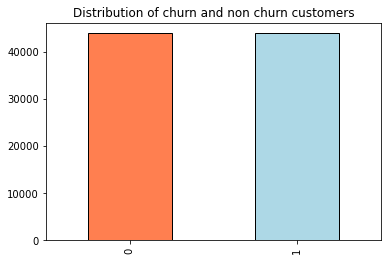

In [26]:
# Checking the distribution of the resampled training set
y_train.value_counts().plot.bar(color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("Distribution of churn and non churn customers")
plt.show()

### Scaling the Features

In [27]:
# Instantiating the scaler function
scaler = StandardScaler()

# Creating dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns) 

# Fitting the numerical columns of the training set and transforming it
all_num_cols = list(telecom.columns.difference(cat_cols).values)
X_train_df[all_num_cols] = scaler.fit_transform(X_train_df[all_num_cols])
X_test_df[all_num_cols] = scaler.transform(X_test_df[all_num_cols])
final_test[all_num_cols] = scaler.transform(final_test[all_num_cols])

In [28]:
X_train_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase
count,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.793200e+04,8.

### Applying PCA to reduct dimensionality

In [29]:
# Instantiating PCA
pca = PCA(random_state=100)

# Fitting X_train data
pca.fit(X_train_df)

PCA(random_state=100)

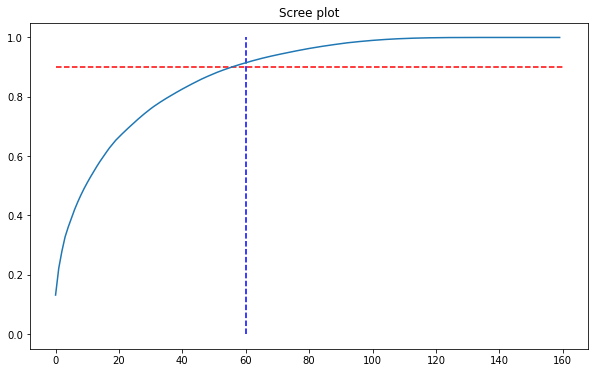

In [30]:
# Checking the cumulative variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

# Plotting the var_cum to select the number of features
plt.figure(figsize=[10,6])
plt.plot(var_cum)
plt.hlines(y=0.90, xmin=0, xmax=160, colors="r", linestyle="--")
plt.vlines(x=60, ymin=0, ymax=1, colors="b", linestyles="--")
plt.title("Scree plot")
plt.show()

#### <font color="blue">Inference from the plot:
> - Around 60 principal components can able to explain 90% variance.

In [31]:
# Reducing the dimensions so that it can explain 90% of variance
pca2 = PCA(0.9, random_state=100)

# Transforming the X_train into principal components
X_train_pca = pca2.fit_transform(X_train_df)
X_test_pca = pca2.transform(X_test_df)
final_test_pca = pca2.transform(final_test)

# Tranforming into dataframes
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
final_test_pca = pd.DataFrame(final_test_pca)

In [32]:
# Checking the shape of the dataframe
print("The shape of the training dataset is",X_train_pca.shape)
print("The shape of the test dataset is",X_test_pca.shape)

The shape of the training dataset is (87932, 57)
The shape of the test dataset is (21000, 57)


## <font color="blue">Modelling

### Logistic Regression

In [33]:
# Instantiating the logistic regression function
lr = LogisticRegression(random_state=100)

# Fitting the dataset
logReg_model = lr.fit(X_train_pca, y_train)

# Making the prediction
y_test_pred_prob = logReg_model.predict_proba(X_test_pca)

In [34]:
y_test_pred_prob[:,1]

array([0.93374147, 0.96935773, 0.83113615, ..., 0.1161006 , 0.00702311,
       0.01646963])

In [35]:
# Creating dataframe for churn probabity
logReg_df = pd.DataFrame(y_test_pred_prob[:,1], columns=["Churn_prob"])
logReg_df["Churn"] = y_test.values
logReg_df["Prediction"] = logReg_df["Churn_prob"].apply(lambda x:1 if x >0.5 else 0)

In [36]:
# Checking the accuracy score of logistic regression model
accuracy_score(y_test, logReg_df["Prediction"])

0.802

### Random Forest

In [37]:
# Finding the best hyperparameters using cross validation

# Instantiating the random forest classifier
rf = RandomForestClassifier()

# Creating the params
params = {
    "max_depth": [4,8,10],
    "min_samples_split" :[100,200],
    "min_samples_leaf": [100,300],
    "n_estimators": [10,40,50],
    "max_features": [3, 6]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train_pca, y_train)

RandomForestClassifier()

In [66]:
y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

In [67]:
accuracy_score(y_test, y_test_pred)

0.9054285714285715